# A look at model comparison
see : https://docs.pymc.io/notebooks/Bayes_factor.html

https://docs.pymc.io/notebooks/model_comparison.html

In [1]:
from collections import OrderedDict
import numpy as np
import pymc3 as pm
import seaborn as sns
sns.set(font_scale=1.5)
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = scipy.stats.nbinom.rvs(50, 0.04, size=20)

In [3]:
with pm.Model() as modelp:
    # fit a poisson and negbin
    p_mean = pm.Uniform('p_mean', 1, 10000)
    p = pm.Poisson('p', mu=p_mean, observed=data)
    tracep = pm.sample(10000, tune=4000)

with pm.Model() as modelnb:
    # fit a poisson and negbin
    nb_mean = pm.Uniform('nb_mean', 1, 10000)
    nb_alpha = pm.Uniform('nb_alpha', 1, 1000)
    nb = pm.NegativeBinomial('nb', mu=nb_mean, alpha=nb_alpha, observed=data)
    tracenb = pm.sample(10000, tune=4000)
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_mean_interval__]
 84%|████████▍ | 11749/14000 [00:07<00:01, 1566.29it/s]INFO (theano.gof.compilelock): Waiting for existing lock by process '68516' (I am process '68517')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '68516' (I am process '68518')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
100%|██████████| 14000/14000 [00:08<00:00, 1566.42it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '68517' (I am process '68518')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1150955c0>,
      dtype=object)

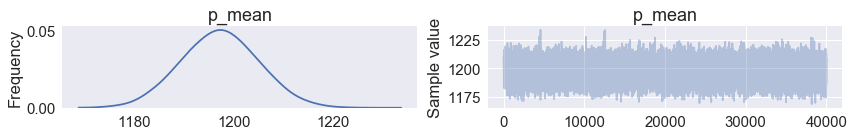

In [4]:
pm.traceplot(tracep, combined=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f1f278>,
      dtype=object)

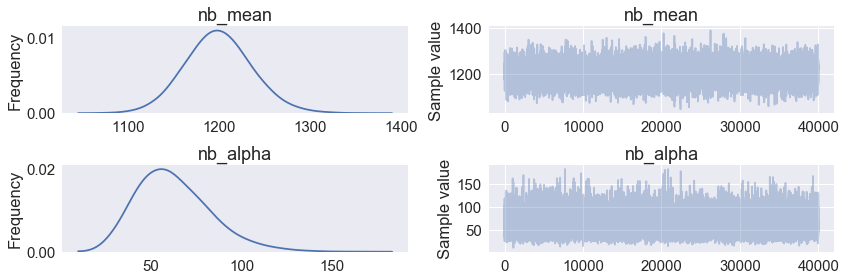

In [5]:
pm.traceplot(tracenb, combined=True)

In [6]:
ppcp = pm.sample_ppc(tracep, samples=1000, model=modelp)
ppcnb = pm.sample_ppc(tracenb, samples=1000, model=modelnb)


100%|██████████| 1000/1000 [00:00<00:00, 2402.92it/s]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


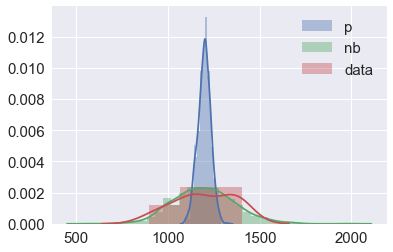

In [7]:
sns.distplot(ppcp['p'], label='p')
sns.distplot(ppcnb['nb'], label='nb')
sns.distplot(data, label='data')
plt.legend()

In [8]:
pm.stats.waic(tracep, model=modelp, progressbar=True)

40000it [00:02, 15749.90it/s]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=621.401542265873, WAIC_se=97.65360344412346, p_WAIC=20.675460859549833, var_warn=1)

In [9]:
pm.stats.waic(tracenb, model=modelnb, progressbar=True)

40000it [00:03, 11114.13it/s]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=263.3917270020847, WAIC_se=5.057315431964927, p_WAIC=1.6615588364072413, var_warn=1)

In [10]:
pm.stats.loo(tracep, model=modelp, progressbar=True)

40000it [00:02, 15049.26it/s]


LOO_r(LOO=621.4165773008951, LOO_se=97.66076522982434, p_LOO=20.68297837706092, shape_warn=0)

In [11]:
pm.stats.loo(tracenb, model=modelnb, progressbar=True)

40000it [00:03, 11160.00it/s]


LOO_r(LOO=263.444465861105, LOO_se=5.083863529618909, p_LOO=1.6879282659174066, shape_warn=0)

In [12]:
modelp.name = 'Poisson'
modelnb.name = 'NegBin'

mods = OrderedDict()
mods[modelp]= tracep
mods[modelnb]= tracenb

comp = pm.stats.compare(mods)
comp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
NegBin,263.39,1.66,0,1,5.06,0,1
Poisson,621.4,20.68,358.01,0,97.65,92.64,1


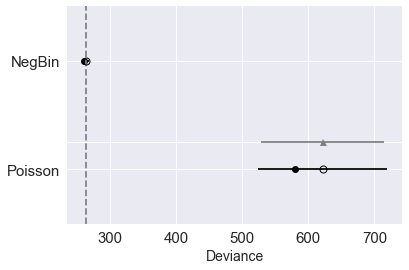

In [13]:
pm.plots.compareplot(comp)

## And try other data



In [14]:
data = scipy.stats.poisson.rvs(50, size=20)

In [15]:
with pm.Model() as modelp:
    # fit a poisson and negbin
    p_mean = pm.Uniform('p_mean', 1, 10000)
    p = pm.Poisson('p', mu=p_mean, observed=data)
    tracep = pm.sample(10000, tune=4000)

with pm.Model() as modelnb:
    # fit a poisson and negbin
    nb_mean = pm.Uniform('nb_mean', 1, 10000)
    nb_alpha = pm.Uniform('nb_alpha', 1, 1000)
    nb = pm.NegativeBinomial('nb', mu=nb_mean, alpha=nb_alpha, observed=data)
    tracenb = pm.sample(10000, tune=4000)
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_mean_interval__]
100%|██████████| 14000/14000 [00:08<00:00, 1572.97it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nb_alpha_interval__, nb_mean_interval__]
100%|██████████| 14000/14000 [00:14<00:00, 989.93it/s]


100%|██████████| 1000/1000 [00:00<00:00, 2495.89it/s]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


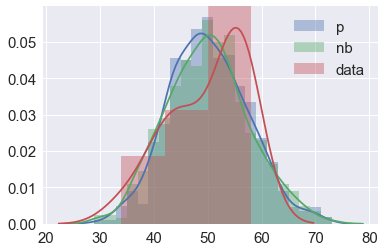

In [16]:
ppcp = pm.sample_ppc(tracep, samples=1000, model=modelp)
ppcnb = pm.sample_ppc(tracenb, samples=1000, model=modelnb)

sns.distplot(ppcp['p'], label='p')
sns.distplot(ppcnb['nb'], label='nb')
sns.distplot(data, label='data')
plt.legend()

In [17]:
modelp.name = 'Poisson'
modelnb.name = 'NegBin'

mods = OrderedDict()
mods[modelp]= tracep
mods[modelnb]= tracenb

comp = pm.stats.compare(mods)
comp

,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
Poisson,137.65,1.02,0,1,5.44,0,0
NegBin,137.83,0.97,0.18,0,4.84,0.61,0


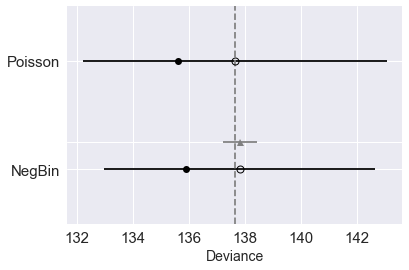

In [18]:
pm.plots.compareplot(comp)